In [1]:
import torch
from codes.model import  ResUnet_LSTM_L, Loss_With_Weight
from torch.utils.data import DataLoader
from codes.dataloader import init_dataset, STEAD_Dataset
from codes import configs
from codes.visualize_and_evaluate import showRawWave,showWave,showProb

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

train_set,val_set,noise_set = init_dataset()
train_set = STEAD_Dataset(train_set)
val_set = STEAD_Dataset(val_set)

eval_dataloader = DataLoader(val_set, shuffle=True,batch_size=1, num_workers=0, drop_last=True)

/root/miniconda3/envs/myconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (7,11,13,14,15,18,19,20,21,22,24,25,26,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


total events in csv file: 1265657
total events selected: 574007


/root/miniconda3/envs/myconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (7,11,13,14,15,18,19,20,21,22,24,25,26,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


total noise selected: 235426


In [2]:
from codes.model import  ResUnet_LSTM_L
model = ResUnet_LSTM_L(False)
model.load_state_dict(torch.load("../result/ckpt/QuackPicker_lstm_iter25000.pt"))
model.eval().to(device)

ResUnet_LSTM_L(
  (res_down_1): _Res1D_convsizefixed_v1(
    (overlapTile): ReflectionPad1d((2, 2))
    (BN_1): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (BN_2): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_1): Conv1d(3, 3, kernel_size=(5,), stride=(1,))
    (conv_2): Conv1d(3, 6, kernel_size=(5,), stride=(1,))
    (bottleneck_conv): Conv1d(3, 6, kernel_size=(1,), stride=(1,))
  )
  (res_down_2): _Res1D_convsizefixed_v1(
    (overlapTile): ReflectionPad1d((2, 2))
    (BN_1): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (BN_2): BatchNorm1d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv_1): Conv1d(6, 6, kernel_size=(5,), stride=(1,))
    (conv_2): Conv1d(6, 9, kernel_size=(5,), stride=(1,))
    (bottleneck_conv): Conv1d(6, 9, kernel_size=(1,), stride=(1,))
  )
  (res_down_3): _Res1D_convsizefixed_v1(
    (overlapTile): ReflectionPad1d((2

In [4]:
iter = enumerate(eval_dataloader,0)

/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=linear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


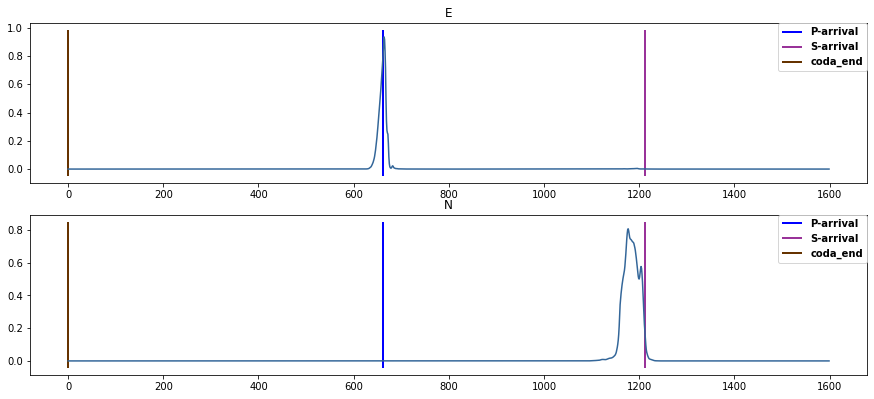

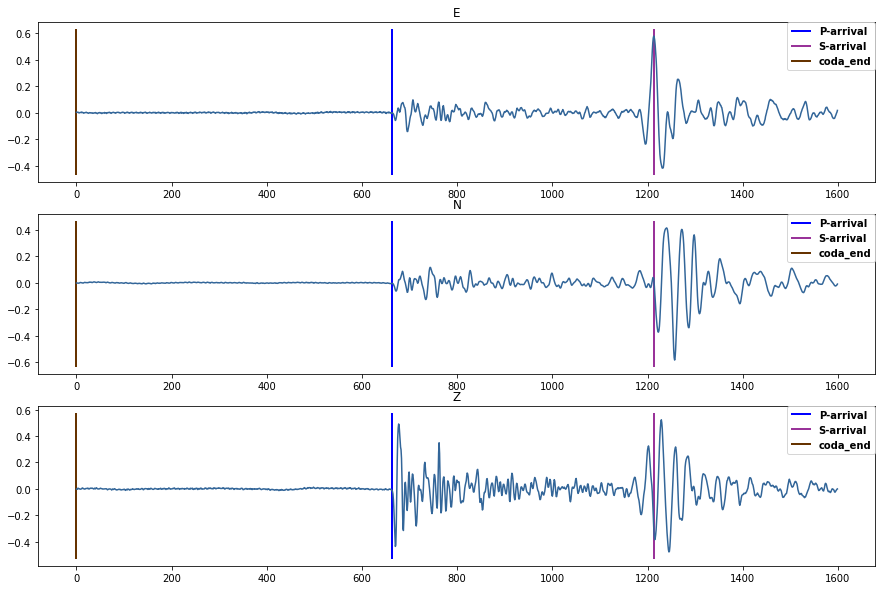

In [33]:
index,data = iter.__next__()
stream,label_p,label_s,p_start,s_start,coda_end = data
output = model(stream.to(device))
showProb(output.detach().cpu()[0],p_start[0],s_start[0],coda_end[0])
showRawWave(stream.detach().cpu()[0],p_start[0],s_start[0],coda_end[0])

/root/miniconda3/envs/myconda/lib/python3.8/site-packages/torch/nn/functional.py:3060: UserWarning: Default upsampling behavior when mode=linear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn("Default upsampling behavior when mode={} is changed "


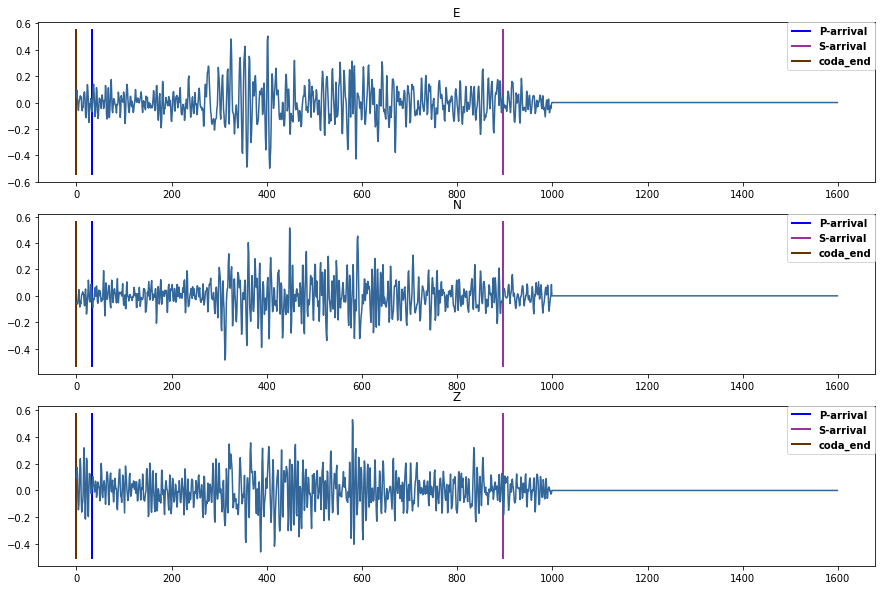

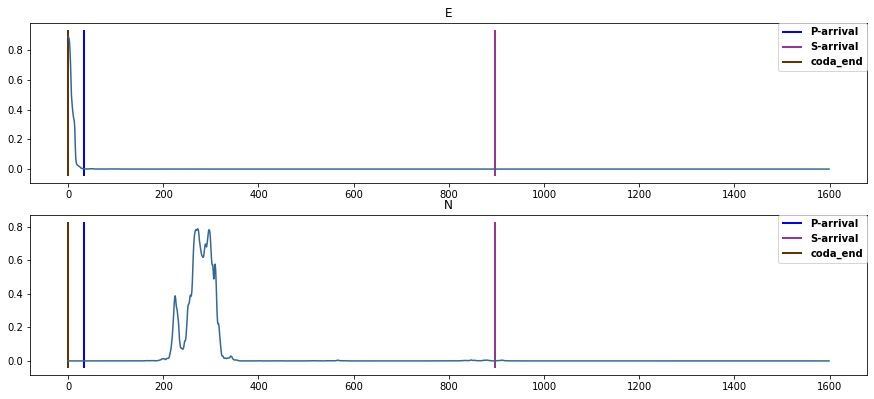

In [28]:
stream_2 = torch.zeros(1,3,1600)
stream_2[:,:,0:999] = stream[:,:,601:1600]
output = model(stream_2.to(device))
showRawWave(stream_2.detach().cpu()[0],p_start[0],s_start[0],coda_end[0])
showProb(output.detach().cpu()[0],p_start[0],s_start[0],coda_end[0])